# <b>Assignment : DT</b>

In [2]:
# from google.colab import drive
# drive.mount("/content/gdrive")

<font color='red'><b> Please check below video before attempting this assignment</b></font>

In [3]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm


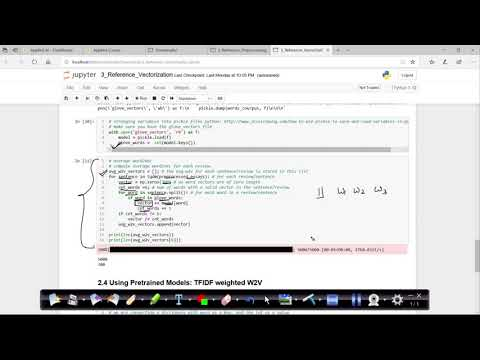

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [5]:
#please use below code to load glove vectors 
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [6]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/shrishti/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/shrishti/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [9]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [10]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [11]:
sent = SentimentIntensityAnalyzer()

In [12]:
# db = data['essay'][0:10]

In [13]:
# polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in db]
# db['sentiment_score'] = polarity


In [14]:
data.head(10)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74
5,ca,mrs,grades_3_5,6,1,math_science history_civics,mathematics socialsciences,it end school year routines run course student...,102.50
6,ca,mrs,grades_3_5,0,1,literacy_language math_science,literacy mathematics,sitting still overrated it makes sense opera m...,1418.08
7,ca,ms,grades_3_5,0,0,math_science history_civics,appliedsciences history_geography,it not enough read book write essay connect de...,495.29
8,ca,ms,grades_prek_2,127,1,literacy_language,esl literacy,never society rapidly changed technology invad...,299.99
9,hi,mrs,grades_3_5,41,1,math_science,appliedsciences mathematics,do remember first time saw star wars wall e ro...,479.94


In [15]:
db = data['essay'][0]
db

'i fortunate enough use fairy tale stem kits classroom well stem journals students really enjoyed i would love implement lakeshore stem kits classroom next school year provide excellent engaging stem lessons my students come variety backgrounds including language socioeconomic status many not lot experience science engineering kits give materials provide exciting opportunities students each month i try several science stem steam projects i would use kits robot help guide science instruction engaging meaningful ways i adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed the following units taught next school year i implement kits magnets motion sink vs float robots i often get units not know if i teaching right way using right materials the kits give additional ideas strategies lessons prepare students science it challenging develop high quality science activities these kits give materials i need provide students science 

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1= db
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)
# sample_sentence_1

sentiment score for sentence 1 {'neg': 0.013, 'neu': 0.783, 'pos': 0.205, 'compound': 0.9867}


In [17]:
# write your code in following steps for task 1
# 1. calculate sentiment scores for the essay feature 
# 2. Split your data.
# 3. perform tfidf vectorization of text data.
# 4. perform tfidf w2v vectorization of text data.
# 5. perform encoding of categorical features.
# 6. perform encoding of numerical features
# 7. For task 1 set 1 stack up all the features
# 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# 11. Plot confusion matrix based on best threshold value
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
# 13. Write your observations about the wordcloud and pdf.

In [18]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## 1. Calculate Sentiment Score for eassy feature 

### When it comes to Sentiment Score , we know that number of positive and negitive words in each document will be counted to determine the document's sentiment score. When it comes to our data we know that we have four kind of sentences positive , negitive , compound and neutral . Lets see how to calculate the sentiment score for one sentence first then we will see how we can implement it in our eassy of data .

In [19]:
db = data['essay'][0]
db

'i fortunate enough use fairy tale stem kits classroom well stem journals students really enjoyed i would love implement lakeshore stem kits classroom next school year provide excellent engaging stem lessons my students come variety backgrounds including language socioeconomic status many not lot experience science engineering kits give materials provide exciting opportunities students each month i try several science stem steam projects i would use kits robot help guide science instruction engaging meaningful ways i adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed the following units taught next school year i implement kits magnets motion sink vs float robots i often get units not know if i teaching right way using right materials the kits give additional ideas strategies lessons prepare students science it challenging develop high quality science activities these kits give materials i need provide students science 

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
db 
ss = sid.polarity_scores(db)
ss

{'neg': 0.013, 'neu': 0.783, 'pos': 0.205, 'compound': 0.9867}

## So we can see when we take sentence into account we get the score as negitive = 0.013 , neutral = 0.783 , positive = 0.205 , neutral = 0.9867 this means our sentence has 98% of compound words in sentence , 20.5 % of positive words , 78.3 % of neutral words and a very small amount of negitive words.

## Lets see how this works on whole data 

In [21]:
## to get the sentiment score of whole data as 
db = data['essay'][0]
db

'i fortunate enough use fairy tale stem kits classroom well stem journals students really enjoyed i would love implement lakeshore stem kits classroom next school year provide excellent engaging stem lessons my students come variety backgrounds including language socioeconomic status many not lot experience science engineering kits give materials provide exciting opportunities students each month i try several science stem steam projects i would use kits robot help guide science instruction engaging meaningful ways i adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed the following units taught next school year i implement kits magnets motion sink vs float robots i often get units not know if i teaching right way using right materials the kits give additional ideas strategies lessons prepare students science it challenging develop high quality science activities these kits give materials i need provide students science 

In [22]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
db 
ss = sid.polarity_scores(db)
ss

{'neg': 0.013, 'neu': 0.783, 'pos': 0.205, 'compound': 0.9867}

In [23]:
## defining the analyzer 
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
## for whole data eassy we will be creating different list of words wihere we can store negitive , positive , compound and neutral wprds
negitive_words = []
positive_words = []
neutral_words = []
compound_words = []


## Next we will get the sentiment score of each kind of word differently and append it to our list 
for words in tqdm(data['essay']):
    negitive_words.append(sid.polarity_scores(words)['neg'])
    positive_words.append(sid.polarity_scores(words)['pos'])
    neutral_words.append(sid.polarity_scores(words)['neu'])
    compound_words.append(sid.polarity_scores(words)['compound'])
    

100%|██████████████████████████████████| 109248/109248 [06:26<00:00, 282.43it/s]


In [24]:
negitive_words

[0.013,
 0.072,
 0.017,
 0.03,
 0.029,
 0.013,
 0.019,
 0.067,
 0.063,
 0.057,
 0.012,
 0.034,
 0.013,
 0.041,
 0.018,
 0.021,
 0.007,
 0.079,
 0.027,
 0.044,
 0.0,
 0.02,
 0.064,
 0.032,
 0.011,
 0.037,
 0.027,
 0.09,
 0.0,
 0.13,
 0.012,
 0.065,
 0.026,
 0.013,
 0.034,
 0.007,
 0.0,
 0.042,
 0.042,
 0.035,
 0.091,
 0.029,
 0.0,
 0.051,
 0.0,
 0.019,
 0.073,
 0.024,
 0.085,
 0.01,
 0.062,
 0.011,
 0.024,
 0.042,
 0.042,
 0.025,
 0.046,
 0.08,
 0.05,
 0.058,
 0.015,
 0.081,
 0.015,
 0.036,
 0.016,
 0.035,
 0.064,
 0.026,
 0.021,
 0.064,
 0.0,
 0.013,
 0.024,
 0.085,
 0.0,
 0.03,
 0.038,
 0.059,
 0.012,
 0.093,
 0.015,
 0.033,
 0.008,
 0.094,
 0.058,
 0.011,
 0.009,
 0.038,
 0.027,
 0.061,
 0.008,
 0.032,
 0.062,
 0.047,
 0.036,
 0.063,
 0.025,
 0.0,
 0.04,
 0.0,
 0.036,
 0.033,
 0.0,
 0.033,
 0.0,
 0.063,
 0.035,
 0.04,
 0.079,
 0.02,
 0.053,
 0.038,
 0.028,
 0.023,
 0.094,
 0.048,
 0.012,
 0.034,
 0.073,
 0.02,
 0.088,
 0.057,
 0.018,
 0.039,
 0.044,
 0.082,
 0.129,
 0.0,
 0.023,
 0.0

In [25]:
positive_words

[0.205,
 0.248,
 0.262,
 0.187,
 0.288,
 0.286,
 0.404,
 0.302,
 0.153,
 0.235,
 0.41,
 0.235,
 0.318,
 0.353,
 0.15,
 0.288,
 0.224,
 0.259,
 0.242,
 0.23,
 0.391,
 0.259,
 0.276,
 0.203,
 0.343,
 0.311,
 0.174,
 0.198,
 0.281,
 0.2,
 0.191,
 0.239,
 0.171,
 0.237,
 0.358,
 0.443,
 0.363,
 0.29,
 0.198,
 0.327,
 0.307,
 0.35,
 0.185,
 0.181,
 0.301,
 0.082,
 0.207,
 0.226,
 0.292,
 0.194,
 0.294,
 0.193,
 0.245,
 0.341,
 0.272,
 0.166,
 0.214,
 0.148,
 0.248,
 0.191,
 0.342,
 0.316,
 0.161,
 0.254,
 0.206,
 0.407,
 0.293,
 0.214,
 0.294,
 0.293,
 0.136,
 0.222,
 0.229,
 0.279,
 0.297,
 0.317,
 0.239,
 0.202,
 0.162,
 0.169,
 0.133,
 0.152,
 0.293,
 0.084,
 0.261,
 0.253,
 0.218,
 0.33,
 0.316,
 0.164,
 0.249,
 0.12,
 0.197,
 0.136,
 0.246,
 0.224,
 0.18,
 0.21,
 0.246,
 0.205,
 0.354,
 0.186,
 0.25,
 0.188,
 0.241,
 0.212,
 0.276,
 0.288,
 0.272,
 0.201,
 0.279,
 0.103,
 0.239,
 0.278,
 0.366,
 0.277,
 0.171,
 0.317,
 0.266,
 0.221,
 0.316,
 0.186,
 0.224,
 0.24,
 0.35,
 0.313,
 0.279

In [26]:
neutral_words

[0.783,
 0.68,
 0.721,
 0.783,
 0.683,
 0.701,
 0.577,
 0.631,
 0.784,
 0.708,
 0.578,
 0.731,
 0.669,
 0.606,
 0.832,
 0.691,
 0.769,
 0.661,
 0.732,
 0.726,
 0.609,
 0.72,
 0.66,
 0.764,
 0.646,
 0.651,
 0.8,
 0.712,
 0.719,
 0.67,
 0.798,
 0.696,
 0.803,
 0.749,
 0.609,
 0.55,
 0.637,
 0.668,
 0.761,
 0.638,
 0.603,
 0.62,
 0.815,
 0.768,
 0.699,
 0.9,
 0.72,
 0.75,
 0.623,
 0.796,
 0.644,
 0.796,
 0.732,
 0.617,
 0.685,
 0.809,
 0.74,
 0.772,
 0.702,
 0.751,
 0.643,
 0.603,
 0.824,
 0.71,
 0.778,
 0.558,
 0.643,
 0.76,
 0.685,
 0.643,
 0.864,
 0.765,
 0.747,
 0.636,
 0.703,
 0.653,
 0.723,
 0.739,
 0.826,
 0.739,
 0.852,
 0.815,
 0.699,
 0.822,
 0.681,
 0.736,
 0.773,
 0.633,
 0.657,
 0.775,
 0.743,
 0.848,
 0.741,
 0.817,
 0.718,
 0.714,
 0.795,
 0.79,
 0.714,
 0.795,
 0.61,
 0.781,
 0.75,
 0.779,
 0.759,
 0.726,
 0.689,
 0.672,
 0.65,
 0.78,
 0.667,
 0.858,
 0.733,
 0.699,
 0.54,
 0.675,
 0.816,
 0.649,
 0.661,
 0.76,
 0.595,
 0.757,
 0.758,
 0.721,
 0.607,
 0.605,
 0.592,
 0.746

In [27]:
compound_words

[0.9867,
 0.9897,
 0.986,
 0.9524,
 0.9873,
 0.9935,
 0.9977,
 0.9964,
 0.9484,
 0.9861,
 0.9976,
 0.9952,
 0.9875,
 0.9955,
 0.9834,
 0.9959,
 0.9899,
 0.995,
 0.9946,
 0.9859,
 0.9954,
 0.9931,
 0.99,
 0.9841,
 0.9968,
 0.9862,
 0.9877,
 0.9686,
 0.9916,
 0.9299,
 0.994,
 0.9938,
 0.9853,
 0.9896,
 0.9967,
 0.9977,
 0.9975,
 0.9941,
 0.9888,
 0.9938,
 0.987,
 0.9901,
 0.9776,
 0.9771,
 0.9904,
 0.7269,
 0.9731,
 0.9861,
 0.9837,
 0.9866,
 0.9958,
 0.9873,
 0.9885,
 0.9938,
 0.9936,
 0.9821,
 0.9756,
 0.8316,
 0.9916,
 0.9675,
 0.9958,
 0.9856,
 0.9694,
 0.9917,
 0.9894,
 0.9935,
 0.9958,
 0.9794,
 0.998,
 0.9958,
 0.9694,
 0.9922,
 0.9951,
 0.9904,
 0.9873,
 0.9937,
 0.9953,
 0.9901,
 0.9399,
 0.8913,
 0.9586,
 0.9423,
 0.9971,
 -0.0299,
 0.9931,
 0.9912,
 0.9955,
 0.9962,
 0.9862,
 0.9079,
 0.9964,
 0.9643,
 0.9793,
 0.9802,
 0.9959,
 0.9858,
 0.9172,
 0.967,
 0.9889,
 0.9774,
 0.9954,
 0.9871,
 0.9917,
 0.9709,
 0.9908,
 0.9517,
 0.996,
 0.9909,
 0.9646,
 0.9888,
 0.9952,
 0.7103,


In [28]:
## adding these new features which were bassed on sentiment intensity analyzer 
data['negitiveWords'] = negitive_words
data['positiveWords'] = positive_words
data['compoundWords'] = compound_words
data['NeutralWords'] = neutral_words

In [29]:
data.head(10)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,negitiveWords,positiveWords,compoundWords,NeutralWords
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.205,0.9867,0.783
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.248,0.9897,0.680
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,0.017,0.262,0.9860,0.721
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,0.030,0.187,0.9524,0.783
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,0.029,0.288,0.9873,0.683
5,ca,mrs,grades_3_5,6,1,math_science history_civics,mathematics socialsciences,it end school year routines run course student...,102.50,0.013,0.286,0.9935,0.701
6,ca,mrs,grades_3_5,0,1,literacy_language math_science,literacy mathematics,sitting still overrated it makes sense opera m...,1418.08,0.019,0.404,0.9977,0.577
7,ca,ms,grades_3_5,0,0,math_science history_civics,appliedsciences history_geography,it not enough read book write essay connect de...,495.29,0.067,0.302,0.9964,0.631
8,ca,ms,grades_prek_2,127,1,literacy_language,esl literacy,never society rapidly changed technology invad...,299.99,0.063,0.153,0.9484,0.784
9,hi,mrs,grades_3_5,41,1,math_science,appliedsciences mathematics,do remember first time saw star wars wall e ro...,479.94,0.057,0.235,0.9861,0.708


## 2. Splitting the data

In [30]:
## Here we are dividing our data into two parts 1. Where our project is approved 2. Where our project is not approved
y = data['project_is_approved'].values
x = data.drop(['project_is_approved'], axis=1)

In [31]:

## Use train test split to stratifically divide the data into two datasets - train , test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y,random_state=42) # as we are using grid search we dont have to use cross validation set

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(73196, 12)
(36052, 12)
(73196,)
(36052,)


# 3. Perform TFIDF vectorization of text data

In [33]:
# Apply TFIDF vectorization on 'Preprocessed_Essay'
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

## We will be doing TFIDF vectorization in two steps :
## 1. We will fit the data 
## 2. We will transform the data

## 1. Fitting the data : For fitting the data we will use count vectorizer which we have already imported
vectorizer_eassy_tfidf = TfidfVectorizer(min_df = 10 , max_features= 5000)
vectorizer_eassy_tfidf.fit(x_train['essay'].values)

## 2. Transforming the data to its vectors form 
x_train_tfidf = vectorizer_eassy_tfidf.transform(x_train['essay'].values)
x_test_tfidf= vectorizer_eassy_tfidf.transform(x_test['essay'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf.shape , y_train.shape)
print("Shape of matrix after one hot encodig ",x_test_tfidf.shape , y_test.shape)

Shape of matrix after one hot encodig  (73196, 5000) (73196,)
Shape of matrix after one hot encodig  (36052, 5000) (36052,)


## After applying TFIDF vectorization in text data which is preprocessed essay we saw that the shape of train data is (73196 , 5000) and test data is (36052 , 5000) , I have set the max features as 5000 thats why we got 5000 values .

## 4. Perform TFIDF w2v vectorization of text data 

## Before performing tfidf w2v vectorisation of text data , we will perform average w2v vectorization on text data 
## we have done average w2v vectorization in 2 parts in genreal ,
## In first part first we go through e very word in the sentence , then we check if that perticular word is present in list of globe vectors , if the word is present in globe vectors we will get a dense vector of the word aand assign count word to it .
## For every word we will repeat this step and get the value of vector and count vector 
## Then we will check ether the value of count vector is zero or not , if it is not zero divide the vector to the count_word and assign this as the final vector , hence this vector is considerd as the final average w2v value .

In [34]:
## calculate average word2vec
## for computing average w2v for each review 
avg_w2v_vectors_train = []   ## list to store the final value of vectors as average_word_2_vector value
for sen in tqdm(x_train['essay']):
    vector = np.zeros(300)  ##initializing vector as zero length
    count_word = 0 ## number of words with a valid vector in the review 
    for word in sen.split():     ## for every word in sentence 
        if word in glove_words:
            vector = vector+model[word]
            count_word = count_word+1
    if count_word != 0:
        vector = vector/count_word
    avg_w2v_vectors_train.append(vector)
        
print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))
# print(avg_w2v_vectors_train)
# print(avg_w2v_vectors_train[0])

100%|███████████████████████████████████| 73196/73196 [00:09<00:00, 7968.83it/s]

73196
300


In [35]:

## calculate average word2vec
## for computing average w2v for each review 
avg_w2v_vectors_test = []   ## list to store the final value of vectors as average_word_2_vector value
for sen in tqdm(x_test['essay']):
    vector = np.zeros(300)  ##initializing vector as zero length
    count_word = 0 ## number of words with a valid vector in the review 
    for word in sen.split():     ## for every word in sentence 
        if word in glove_words:
            vector = vector+model[word]
            count_word = count_word+1
    if count_word != 0:
        vector = vector/count_word
    avg_w2v_vectors_test.append(vector)
        
print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))
# print(avg_w2v_vectors_test)
# print(avg_w2v_vectors_test[0])

100%|███████████████████████████████████| 36052/36052 [00:04<00:00, 8193.77it/s]

36052
300


# 4.1 Performing tfidf w2v vectorization of text data 


TFIDF w2v vectorization works in exact same way as average w2v only in case of TFIDF vectorization first we will create a set of tfidf words which will have the features name of tfidf vectorization and now we will check if our word is present i  globe vectors and in this tfidf word set , if it is present we will calculate the tfidf value for each word and get the vector value as vector value * tfidf value and we will keep on appending this value .

## 4.1.1 - Train Data

In [36]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [38]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)
tfidf_w2v_vectors_train = np.array( tfidf_w2v_vectors_train)

print(len( tfidf_w2v_vectors_train))
print(len( tfidf_w2v_vectors_train[0]))
print("Shape of matrix after tfidf w2v vectors" ,  tfidf_w2v_vectors_train.shape)

100%|████████████████████████████████████| 73196/73196 [01:21<00:00, 900.76it/s]

73196
300
Shape of matrix after tfidf w2v vectors (73196, 300)


**After TFIDF W2V vectorization we can see the shape of our vectors are (73196 , 300) and this is for train data .**

## As we calulated the TFIDF word2vec value for train data same we will calculate for test data 

## 4.1.2 - Test Data

In [39]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_test['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [40]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)
tfidf_w2v_vectors_test = np.array( tfidf_w2v_vectors_test)

print(len( tfidf_w2v_vectors_test))
print(len( tfidf_w2v_vectors_test[0]))
print("Shape of matrix after tfidf w2v vectors" ,  tfidf_w2v_vectors_test.shape)

100%|████████████████████████████████████| 36052/36052 [00:40<00:00, 898.95it/s]

36052
300
Shape of matrix after tfidf w2v vectors (36052, 300)


**We can see the shape of matrix after tfidf word2vec vectorization on test data is (36052 , 300)**

# Next comes the encoding of variable which means converting the variables into numerical forms
# The first part is Encoding Categorical features , for encoding text variables we will use Count vectorizer .
# We have in total 5 categorical features ; School_state , Teacher_Prefix , Clean_Category , Clean_Sub_Category , project_grade_Category . we will use count vectorization in all of them and and get the values after vectorization .

# 5. perform encoding of categorical features.

In [55]:
## Refrence https://stackoverflow.com/questions/66122577/response-coding-for-categorical-data
def response_code(feature , dataframe):
    ## getting all the values together which means appending wether the project is approved or not in x_train as label feature 
    x_train['label'] = y_train
    ##printing x_train and checking wether label is added or not 
#     print (x_train.head(10))
    
    ##counting all the values present in a feature 
    ## this count will be used in final probability calculation 
    count = x_train[feature].value_counts()
#     print(count)
    
    ## differentiating values of class 0 and class 1 , count the value and get the probability 
    
    # create a dictonary to save all the values and get its value 
    save_val = {}
    ## for every value in total dictonary 
    for dif_val , total_count in count.items():
        ## create a list to sore the probability 
        probability = []
        ## calculating the probability 
        ## for calculating probabilty I am using two values val 1 which will store 0 and val 2 which will store 1 
        for j in range(2):
            val_1 = x_train.loc[(x_train['label'] == j-1) & (x_train[feature] == dif_val)]
            val_2 = x_train.loc[(x_train['label'] == j) & (x_train[feature] == dif_val)]
            ## we will use only those values which have 1 as there label value as 1 
            prob = len(val_2)/total_count
            ## Got the value of probability
            probability.append(prob)
        ## storing the probabilities of individual values in save_val dictonary
        save_val[dif_val]=probability
        ## printing save_val and observing the the probabilities of individual value
#     print(save_val)
    
    ## creating a list to store the final response_variable 
    response_variable = [] 
    
    ## checking if a value is present in the dataframe or not 
    for rs in dataframe[feature]:
        if rs in dict(count).keys():
            ## if the value is present in dataframe append it to the final response variable list 
            response_variable.append(save_val[rs])
        else:
            ## else append a different list 
            response_variable.append([0.3,0.03])
    res = np.array(response_variable)
    return res

                        
            
    
    

School_State

In [58]:
# # Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# ## We will be doing vectorization in two steps :
# ## 1. We will fit the data 
# ## 2. We will transform the data



# ## 1. Fitting the data : For fitting the data we will use count vectorizer which we have already imported
# vectorizer_school_state = CountVectorizer() 
# vectorizer_school_state.fit(x_train['school_state'].values)
    
# ## 2. Transforming the data to its vectors form 
# x_train_school_state = vectorizer_school_state.transform(x_train['school_state'].values)
# x_test_school_state = vectorizer_school_state.transform(x_test['school_state'].values)

# print("Shape of matrix after one hot encodig on Train Data",x_train_school_state.shape)
# print("Shape of matrix after one hot encodig on Test Data",x_test_school_state.shape)

# ## Lets get the feature names present in school state https://stackoverflow.com/questions/42525072/get-selected-feature-names-tfidf-vectorizer#:~:text=You%20can%20use%20tfidf_vectorizer.,selected)%20from%20the%20raw%20documents.
# print("Features Names are : ", vectorizer_school_state.get_feature_names())

## As we can see we have used Count_Vectorizer to fit our values and then we have transformed our data , and then we got the shape of the atrix after one hot encoding , the shape of train data  is (73196,51) and that of test data is (36052 , 51) also we printed the features name .

Teacher Prefix

In [60]:
# # Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# ## We will be doing vectorization in two steps :
# ## 1. We will fit the data 
# ## 2. We will transform the data



# ## 1. Fitting the data : For fitting the data we will use count vectorizer which we have already imported
# vectorizer_teacher_prefix = CountVectorizer() 
# vectorizer_teacher_prefix.fit(x_train['teacher_prefix'].values)
    
# ## 2. Transforming the data to its vectors form 
# x_train_teacher_prefix = vectorizer_teacher_prefix.transform(x_train['teacher_prefix'].values)
# x_test_teacher_prefix = vectorizer_teacher_prefix.transform(x_test['teacher_prefix'].values)

# print("Shape of matrix after one hot encodig on Train Data",x_train_teacher_prefix.shape)
# print("Shape of matrix after one hot encodig on Test Data",x_test_teacher_prefix.shape)

# ## Lets get the feature names present in school state https://stackoverflow.com/questions/42525072/get-selected-feature-names-tfidf-vectorizer#:~:text=You%20can%20use%20tfidf_vectorizer.,selected)%20from%20the%20raw%20documents.
# print("Features Names are : ", vectorizer_teacher_prefix.get_feature_names())

Clean Category

In [62]:
# # Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# ## We will be doing vectorization in two steps :
# ## 1. We will fit the data 
# ## 2. We will transform the data



# ## 1. Fitting the data : For fitting the data we will use count vectorizer which we have already imported
# vectorizer_clean_categories = CountVectorizer() 
# vectorizer_clean_categories.fit(x_train['clean_categories'].values)
    
# ## 2. Transforming the data to its vectors form 
# x_train_clean_categories = vectorizer_clean_categories.transform(x_train['clean_categories'].values)
# x_test_clean_categories = vectorizer_clean_categories.transform(x_test['clean_categories'].values)

# print("Shape of matrix after one hot encodig on Train Data",x_train_clean_categories.shape)
# print("Shape of matrix after one hot encodig on Test Data",x_test_clean_categories.shape)

# ## Lets get the feature names present in school state https://stackoverflow.com/questions/42525072/get-selected-feature-names-tfidf-vectorizer#:~:text=You%20can%20use%20tfidf_vectorizer.,selected)%20from%20the%20raw%20documents.
# print("Features Names are : ", vectorizer_clean_categories.get_feature_names())

Clean Sub Categories

In [64]:
# # Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# ## We will be doing vectorization in two steps :
# ## 1. We will fit the data 
# ## 2. We will transform the data



# ## 1. Fitting the data : For fitting the data we will use count vectorizer which we have already imported
# vectorizer_clean_subcategories = CountVectorizer() 
# vectorizer_clean_subcategories.fit(x_train['clean_subcategories'].values)
    
# ## 2. Transforming the data to its vectors form 
# x_train_clean_subcategories = vectorizer_clean_subcategories.transform(x_train['clean_subcategories'].values)
# x_test_clean_subcategories = vectorizer_clean_subcategories.transform(x_test['clean_subcategories'].values)

# print("Shape of matrix after one hot encodig on Train Data",x_train_clean_subcategories.shape)
# print("Shape of matrix after one hot encodig on Test Data",x_test_clean_subcategories.shape)
# print('\n')
# ## Lets get the feature names present in school state https://stackoverflow.com/questions/42525072/get-selected-feature-names-tfidf-vectorizer#:~:text=You%20can%20use%20tfidf_vectorizer.,selected)%20from%20the%20raw%20documents.
# print("Features Names are : ", vectorizer_clean_subcategories.get_feature_names())

project_grade_category

In [66]:
# # Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# ## We will be doing vectorization in two steps :
# ## 1. We will fit the data 
# ## 2. We will transform the data



# ## 1. Fitting the data : For fitting the data we will use count vectorizer which we have already imported
# vectorizer_project_grade_category = CountVectorizer() 
# vectorizer_project_grade_category.fit(x_train['project_grade_category'].values)
    
# ## 2. Transforming the data to its vectors form 
# x_train_project_grade_category = vectorizer_project_grade_category.transform(x_train['project_grade_category'].values)
# x_test_project_grade_category = vectorizer_project_grade_category.transform(x_test['project_grade_category'].values)

# print("Shape of matrix after one hot encodig on Train Data",x_train_project_grade_category.shape)
# print("Shape of matrix after one hot encodig on Test Data",x_test_project_grade_category.shape)

# ## Lets get the feature names present in school state https://stackoverflow.com/questions/42525072/get-selected-feature-names-tfidf-vectorizer#:~:text=You%20can%20use%20tfidf_vectorizer.,selected)%20from%20the%20raw%20documents.
# print("Features Names are : ", vectorizer_project_grade_category.get_feature_names())

# 6. Perform Encoding on Numerical Features .

## For performing Encoding on Numerical Features we will be using Normalizer , again there are basic two steps whenever we perform encoding 1. Fitting the model in our data and next is transforming our data using the model .

## We have total 6 numerical features which are Price , Teacher_No_Of_Previously submitted_projects , Positive_Words , Negitive_Words , Compound_Words , Neutral_Words 

## For each of the numerical feature we will do the same thing that is using normalizer for fitting and then transforming our data.

6.1 Price

In [67]:
# Apply Normalization on the numerical features using Normalizer().
## Using Normalization : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

## We will be doing vectorization in two steps :
## 1. We will fit the data on train set
## 2. We will transform the data of train set
## 3. We will fit the data of test set
## 4. We will transform the data of t0est set



## 1. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_price = Normalizer() 
vectorizer_price.fit(x_train['price'].values.reshape(1,-1))

## 2. Transforming the data to its vectors form 
x_train_price  = vectorizer_price.transform(x_train['price'].values.reshape(1,-1))
x_train_price = x_train_price.reshape(-1,1)
print("Shape of matrix after Normalizing data on Train Data",x_train_price.shape)

## 3. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_price1 = Normalizer() 
vectorizer_price1.fit(x_test['price'].values.reshape(1,-1))

## 4. Transforming the data to its vectors form 
x_test_price  = vectorizer_price1.transform(x_test['price'].values.reshape(1,-1))
x_test_price = x_test_price.reshape(-1,1)
print("Shape of matrix after Normalizing data on Test Data",x_test_price.shape)


Shape of matrix after Normalizing data on Train Data (73196, 1)
Shape of matrix after Normalizing data on Test Data (36052, 1)


6.2 Teacher_Number_of_previously_posted_projects

In [68]:
# Apply Normalization on the numerical features using Normalizer().
## Using Normalization : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

## We will be doing vectorization in two steps :
## 1. We will fit the data on train set
## 2. We will transform the data of train set
## 3. We will fit the data of test set
## 4. We will transform the data of test set



## 1. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_teacher_number_of_previously_posted_projects = Normalizer() 
vectorizer_teacher_number_of_previously_posted_projects.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

## 2. Transforming the data to its vectors form 
x_train_teacher_number_of_previously_posted_projects  = vectorizer_teacher_number_of_previously_posted_projects.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_train_teacher_number_of_previously_posted_projects = x_train_teacher_number_of_previously_posted_projects.reshape(-1,1)
print("Shape of matrix after Normalizing data on Train Data",x_train_teacher_number_of_previously_posted_projects.shape)

## 3. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_teacher_number_of_previously_posted_projects1 = Normalizer() 
vectorizer_teacher_number_of_previously_posted_projects1.fit(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

## 4. Transforming the data to its vectors form 
x_test_teacher_number_of_previously_posted_projects  = vectorizer_teacher_number_of_previously_posted_projects1.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_teacher_number_of_previously_posted_projects = x_test_teacher_number_of_previously_posted_projects.reshape(-1,1)
print("Shape of matrix after Normalizing data on Test Data",x_test_teacher_number_of_previously_posted_projects.shape)


Shape of matrix after Normalizing data on Train Data (73196, 1)
Shape of matrix after Normalizing data on Test Data (36052, 1)


6.3 Positive_Words

In [69]:
# Apply Normalization on the numerical features using Normalizer().
## Using Normalization : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

## We will be doing vectorization in two steps :
## 1. We will fit the data on train set
## 2. We will transform the data of train set
## 3. We will fit the data of test set
## 4. We will transform the data of test set



## 1. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_Positive_words = Normalizer() 
vectorizer_Positive_words.fit(x_train['positiveWords'].values.reshape(1,-1))

## 2. Transforming the data to its vectors form 
x_train_positive_words  = vectorizer_Positive_words.transform(x_train['positiveWords'].values.reshape(1,-1))
x_train_positive_words = x_train_positive_words.reshape(-1,1)
print("Shape of matrix after Normalizing data on Train Data",x_train_positive_words.shape)

## 3. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_positive_words = Normalizer()  
vectorizer_positive_words.fit(x_test['positiveWords'].values.reshape(1,-1))

## 4. Transforming the data to its vectors form 
x_test_positive_words  = vectorizer_positive_words.transform(x_test['positiveWords'].values.reshape(1,-1))
x_test_positive_words = x_test_positive_words.reshape(-1,1)
print("Shape of matrix after Normalizing data on Test Data",x_test_positive_words.shape)


Shape of matrix after Normalizing data on Train Data (73196, 1)
Shape of matrix after Normalizing data on Test Data (36052, 1)


6.4 Negitive Words

In [70]:
# Apply Normalization on the numerical features using Normalizer().
## Using Normalization : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

## We will be doing vectorization in two steps :
## 1. We will fit the data on train set
## 2. We will transform the data of train set
## 3. We will fit the data of test set
## 4. We will transform the data of test set



## 1. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_negitive_words = Normalizer() 
vectorizer_negitive_words.fit(x_train['negitiveWords'].values.reshape(1,-1))

## 2. Transforming the data to its vectors form 
x_train_negitive_words  = vectorizer_negitive_words.transform(x_train['negitiveWords'].values.reshape(1,-1))
x_train_negitive_words = x_train_negitive_words.reshape(-1,1)
print("Shape of matrix after Normalizing data on Train Data",x_train_negitive_words.shape)

## 3. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_negitive_words = Normalizer()  
vectorizer_negitive_words.fit(x_test['negitiveWords'].values.reshape(1,-1))

## 4. Transforming the data to its vectors form 
x_test_negitive_words  = vectorizer_negitive_words.transform(x_test['negitiveWords'].values.reshape(1,-1))
x_test_negitive_words = x_test_negitive_words.reshape(-1,1)
print("Shape of matrix after Normalizing data on Test Data",x_test_negitive_words.shape)


Shape of matrix after Normalizing data on Train Data (73196, 1)
Shape of matrix after Normalizing data on Test Data (36052, 1)


6.5 Compound Words 

In [71]:
# Apply Normalization on the numerical features using Normalizer().
## Using Normalization : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

## We will be doing vectorization in two steps :
## 1. We will fit the data on train set
## 2. We will transform the data of train set
## 3. We will fit the data of test set
## 4. We will transform the data of test set



## 1. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_compound_words = Normalizer() 
vectorizer_compound_words.fit(x_train['compoundWords'].values.reshape(1,-1))

## 2. Transforming the data to its vectors form 
x_train_compound_words  = vectorizer_compound_words.transform(x_train['compoundWords'].values.reshape(1,-1))
x_train_compound_words = x_train_compound_words.reshape(-1,1)
print("Shape of matrix after Normalizing data on Train Data",x_train_compound_words.shape)

## 3. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_compound_words = Normalizer()  
vectorizer_compound_words.fit(x_test['compoundWords'].values.reshape(1,-1))

## 4. Transforming the data to its vectors form 
x_test_compound_words  = vectorizer_compound_words.transform(x_test['compoundWords'].values.reshape(1,-1))
x_test_compound_words = x_test_compound_words.reshape(-1,1)
print("Shape of matrix after Normalizing data on Test Data",x_test_compound_words.shape)


Shape of matrix after Normalizing data on Train Data (73196, 1)
Shape of matrix after Normalizing data on Test Data (36052, 1)


6.6 Neutral Words

In [72]:
# Apply Normalization on the numerical features using Normalizer().
## Using Normalization : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

## We will be doing vectorization in two steps :
## 1. We will fit the data on train set
## 2. We will transform the data of train set
## 3. We will fit the data of test set
## 4. We will transform the data of test set



## 1. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_neutral_words = Normalizer() 
vectorizer_neutral_words.fit(x_train['NeutralWords'].values.reshape(1,-1))

## 2. Transforming the data to its vectors form 
x_train_neutral_words  = vectorizer_neutral_words.transform(x_train['NeutralWords'].values.reshape(1,-1))
x_train_neutral_words = x_train_neutral_words.reshape(-1,1)
print("Shape of matrix after Normalizing data on Train Data",x_train_compound_words.shape)

## 3. Fitting the data : For fitting the data we will use Normalizer which we have already imported
vectorizer_neutral_words = Normalizer()  
vectorizer_neutral_words.fit(x_test['NeutralWords'].values.reshape(1,-1))

## 4. Transforming the data to its vectors form 
x_test_neutral_words  = vectorizer_compound_words.transform(x_test['NeutralWords'].values.reshape(1,-1))
x_test_neutral_words = x_test_compound_words.reshape(-1,1)
print("Shape of matrix after Normalizing data on Test Data",x_test_neutral_words.shape)


Shape of matrix after Normalizing data on Train Data (73196, 1)
Shape of matrix after Normalizing data on Test Data (36052, 1)


# After encoding our numerical features , categorical features next we have to do is stacking , Instacking we are doing two parts 

# 1. Stacking all the categorical , numerical values together with the tfidf vectorization 
# 2. Stacking all the categorical , numerical values together with the tfidf word2vec vectorization

# 7. For task 1 set 1 stack up all the features


SET 1 - Categorical , numerical features + TFIDF 

In [73]:
# we can concat using : https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

x_train_concat = hstack((x_train_tfidf,x_train_school_state , x_train_teacher_prefix , x_train_clean_categories , x_train_clean_subcategories , x_train_project_grade_category , x_train_price , x_train_teacher_number_of_previously_posted_projects , x_train_positive_words , x_train_negitive_words , x_train_compound_words , x_train_neutral_words))
x_test_concat = hstack((x_test_tfidf,x_test_school_state , x_test_teacher_prefix , x_test_clean_categories , x_test_clean_subcategories , x_test_project_grade_category , x_test_price , x_test_teacher_number_of_previously_posted_projects ,  x_test_positive_words , x_test_negitive_words , x_test_compound_words , x_test_neutral_words))

print("Shape of Train and test after stacking ")
print(x_train_concat.shape)
print(x_test_concat.shape)


Shape of Train and test after stacking 
(73196, 5016)
(36052, 5016)


## 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)


## For stacking we have used hstack function and we got the shape of resultant matrix as follow :
## for  Stack 1 - we got x_train_concat as (73196 , 5105)  and x_test_concat as (36052 , 5105)
## for Stack 2 - we got x_tran_concat1 as (73196 , 405) and x_test_concat1 as (36052 , 405)

# **Next we have hyperparameter tuning , 3D plot , confusion Matrix , word cloud , Boxplot and pdf graph**

# **All these things we will do in both of our Stacks , Stack 1 and Stack 2 seperatly , we will start from Stack 1 , do all the things , perform hyperparameter tuning , plotting confusion matrix , plotting 3D plot and get our results and get the conclusions from all the things**

# ***Starting from Stack 1***

# **Performing hyperparameter tuning , 3d plot , confusion matrix on Stack1**

## 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.


## 9.1 Hyperparameter tuning using GridSearch 

In [1]:
%%time

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}

decision_tree= DecisionTreeClassifier(class_weight='balanced') 
model = GridSearchCV(decision_tree, param_grid=params, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
model.fit(x_train_concat,y_train)

NameError: name 'x_train_concat' is not defined

## I have used GridSearch cv for hyperparameter tuning here I have set the parameters as max_depth and min_sample_split that was already provided to us , we have defined the cross - validation value as 5 and defined all the other neccesary  parameters.

## I have also called the decision tree classifier to define our decision trees , i have only used class_weight as the parameter because we have already defined our parameters t be used in grid search in  a dictonary called **params** .

## 9.2 Plotting 3D plot using the hyperparameters




## Our Next Task is to plot a 3D plot using the hyperparmeters . for 3D plot we need the train AUC , cv AUC for the plotting purpose so we are dclculating the Train AUC , CV AUC using the mean score and std score values

In [ ]:
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
train_auc= model.cv_results_['mean_train_score']
train_auc_std= model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score'] 
cv_auc_std= model.cv_results_['std_test_score']

In [ ]:
train_auc

In [ ]:
train_auc_std

In [ ]:
cv_auc

In [ ]:
cv_auc_std

## As we got the values of trai auc , cv auc our next task is to plot 3D plots using the min_sample split as X axis , max_depth as y axis and AUC score which is train auc and cv auc as z axis .

## Lets see how the 3D plot is created 

In [ ]:
## for ploting the 3D plot the first thing we need do is import plotly  min_sample_split, Y-axis as max_depth, and Z-axis as AUC Score 
## for ploting 3D plot first we imported plotly 
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt

min_samples_split = [5, 10, 100, 500]
max_depth = [1, 5, 10, 50]

x1 = min_samples_split
y1 = max_depth
z1 = train_auc
z2 = cv_auc
print(z1)
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x1,y=y1,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()


# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)


## After pltting 3d plot our next Task is to find the best parameter , fit the model with our best parameters , plot the AUC , ROC Curve and get the values using the predict_proba function

## The first thing we need to do is get the best parameters , to get the best parameters we are using best_score parameter and best_score and best_params attributes .

In [ ]:
## Next step is printing best scores for train data , test data , Overall best score , Best parameter 
## Refrence : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
train_accuracy = print('Train Accuracy : %.3f' %model.best_estimator_.score(x_train_concat , y_train))
test_accuracy = print('Test Accuracy : %.3f' %model.best_estimator_.score(x_test_concat , y_test))
best_accuracy = print('Best Accuracy through Grid Search  %.3f' %model.best_score_)
best_parameter = print('Best Parameters : ',model.best_params_)




## We can see that we got Best parameter as {'max_depth': 10, 'min_samples_split': 500} , also we got best accuracy of model through grid search as 0.650 and got train and test accuracys as 0.661 and 0.636 respectively 

# **Next we have fitting our decision trees with the best parameter values , best parameter which we have got from our Grid Search**

In [ ]:
%%time

## for fitting our model the first thing is importing model from sklearn , next is defing the best parameters  then comes defining our model and at last comes fitting the model into x_concat and y_train 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.tree import DecisionTreeClassifier     ## importing model
params = {'max_depth': [10], 'min_samples_split': [500]}    ## defining the parameters 

decision_tree= DecisionTreeClassifier(class_weight='balanced' , max_depth= 10 , min_samples_split=500)   ## defining our model 
decision_tree.fit(x_train_concat , y_train)    ## fitting our model into train values 

# **Once we have fitted our model with the best parameters then comes the part in which we plot AUC ROC curve or we can say error plot.**

In [ ]:
%%time

## for plotting roc_curve there are some steps which starts from defining the train and test probability using predict proba function , then comes getting the fpr , tpr and threshold values for our data nd then finally plotting the graph 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc     ## importing the roc , auc curve from sklearn 
# Getting the predicted probability scores for test and train values

## defining the train_pred and test_pred using predict_proba 
y_train_pred = decision_tree.predict_proba(x_train_concat)[:,1]   
y_test_pred = decision_tree.predict_proba(x_test_concat)[:,1]

## getting the tpr , fpr and threshold values 
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

## finally plotting graph 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Plot")
plt.grid()
plt.show()

## Conclusion and observation from AUC ROC curve:
## As we know  Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

## Also we know the higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes, so as we see the train AUC has higher value then test AUC this means while trainig time the model is performing slightly better then while testing time although there is not way too much difference but still there is little difference .

# 11. Plot confusion matrix based on best threshold value


## After we plot the AUC-ROC curve we move to next part which is confusion matrix

## For plotting the appropriate Confusion matrix first thing is defining a function which will determone the best probability for a perticular threshold 

## 11.1 - Defining a function for finding best probability

In [ ]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)

def find_best_probability(probability , threshold , fpr , tpr):
    ## we can find the threshold using the formula tpr(1-fpr)
    ## for threshold to be maximum we are using np.argmax function which yeilds the maximum value
    threshold = threshold[np.argmax(tpr*(1-fpr))]   
    print("Value of fpr(1-tpr) is " , threshold ,  "for threshold" , np.round(threshold,3))
    
    prediction = []
    for j in probability:
        if j>=threshold:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

## Next is getting a classification report which shows the precision , recall , f1-score 

## 11.2 - Getting the classification report 

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

from sklearn.metrics import classification_report

y_pred_new = decision_tree.predict(x_test_concat)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_new, target_names = target_names))

## Conclusion and Observation :
## As we know **Recall** is  the ability of a classification model to identify all data points in a relevant class , **Precision** is  the ability of a classification model to return only the data points in a class and **F1 score** is a single metric that combines recall and precision using the harmonic mean. 

## So we can say for **class 0 we have 22% of the data points which are in relevent class**

## and in **class 1 we have around 89% of points which belong to relevent class.**

## **This means class 1 have more weightage then class 0**





## After getting the classification report score next comes determining the accuracy on test data .

## 11.3 - Accuracy , Precision , Recall on Test Data 

In [ ]:
%%time
## lets find the accuracy , precission , recall and f1 score on test dataset
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

y_pred_new = decision_tree.predict(x_test_concat)

test_accuracy = print(' Accuracy on test dataset: %.3f' %accuracy_score(y_test , y_pred_new))
test_Precision_score = print(' Precision  on test dataset: %.3f' %precision_score(y_test , y_pred_new))
test_f1_score = print(' F1 score on test dataset: %.3f' %f1_score(y_test , y_pred_new))
recall_score = print(' Recall score on test dataset: %.3f' %recall_score(y_test , y_pred_new))


## Conclusion 
## By above values we can say that Accuracy on our test data is around 63% which is not too good but yes it can be considered

## Next Comes the Confusion Matrix 
## 11.4 - Confusion Matrix



In [ ]:
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
## https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn
from sklearn.metrics import confusion_matrix

print("Confusion Matrix of Train Dataset: ")

# print(confusion_matrix(y_train, find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr)))

confusion_metric = metrics.confusion_matrix(y_train ,find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr))
## For heat maphttps://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
## If annot is True data value is written inside each cell and cmao is used for colour coordination of the confusion matrix 
sns.heatmap(confusion_metric , annot=True , fmt='d' , cmap = 'Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Conclusion and Observation :
After plotting the confusion Matrix on Train Dataset we observe that 

1. There are 7106 values whose actual value is 0 and predicted value is also 0 hence 10% of total values .

2. Next comes values whose actual value is 0 and pedicted value is 1 which is 3977 values which is around 6% of total values .

3. Next comes values whose actual value is 1 and predicted value is 0 there comes 21130 values which 29% of total values .

4. At last we have 55% of values where actual value is also 1 and predicted value is also 1 .



In [ ]:
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
## 10% , 6% , 29% , 55%
## https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn
from sklearn.metrics import confusion_matrix

print("Confusion Matrix of Test Dataset: ")

##print(confusion_matrix(y_train, find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr)))

confusion_metric = metrics.confusion_matrix(y_test ,find_best_probability(y_test_pred, test_thresholds, test_fpr, test_tpr))
## Fir heat maphttps://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
## If annot is True data value is written inside each cell and cmao is used for colour coordination of the confusion matrix 
sns.heatmap(confusion_metric , annot=True , fmt='d' , cmap = 'Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Conclusion and Observation :
After plotting confusion matrix on test data we observe that:
1. There are 3193 values whose actual class is 0 and predicted class is 0 
2. There are 2266 values whose actual class is 0 and predicted class is 1
3. There are 11002 values whose actual class is 1 and predicted class is 0 
4. There are 19591 values whose actual class is 1 and predicted class is 1 

# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.


## 12.1 - Finding all the false positive data points and creating a dataframe of these false positive words .

In [ ]:
## https://datascience.stackexchange.com/questions/97499/viewing-false-positive-rows-in-python
predict = find_best_probability(y_test_pred, test_thresholds, test_fpr, test_tpr)
false_positive = []

for i in range(len(y_test)):
    if (predict[i] == 1) and (y_test[i] == 0):
        false_positive.append(i)
len(false_positive)


## to find the false positive values what we are doing is we are getting all the values in the test data where our actual value is 0 and our predicted value is 1 , so we got around 2266 values .

In [ ]:
coloumn = x_test.columns    ## getting the columns of x_test data
x_test_false_positive = pd.DataFrame(columns = coloumn)    ##creating a dataset
x_test_false_positive = x_test.iloc[false_positive]     ## inserting false positive values
x_test_false_positive  ## showing the values   
print(x_test_false_positive.shape)   

## In above code we have created a dataframe which contain all the false positive values 

## 12.2 Plotting the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`


## Our next task is to plot the wordCloud ,
We all know Word Cloud is a data visualization technique that is used for representing **text data in which the size of each word indicates its frequency or importance.** Significant textual data points can be highlighted using a word cloud.

So for plotting the word cloud there are some basic steps to be followed 

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in x_test_false_positive['essay']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Conclusion and Observation :
We can see that the most important words in our essay are **student** , **classroom** , **school** and there are many other words .

If we observe carefully we can see that the important words are coloured with dark colors and as the importance of the word decreases the 



## 12.2 Plot the box plot with the `price` of these `false positive data points`


In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot('price',  data=x_test_false_positive)
plt.title("Box Plot of 'price' on false positive data")
plt.show()

## 12.3 Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`


In [ ]:
# initializing random values
data = x_test_false_positive['teacher_number_of_previously_posted_projects']
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)

# printing the value of pdf and bins
print(pdf)  
print("\n")
print(bins_count)
print("\n")

# plotting PDF
plt.plot(bins_count[1:], pdf, color="red")
plt.xlabel('teacher_number_of_previously_posted_projects')

plt.title('PDF of false positive data points and teacher_number_of_previously_posted_projects')



# 13. Write your observations about the wordcloud and pdf.

## Observation for WordCloud :
In case of wordcloud we saw that as the importance of the word was increasing the colour of the word was highliting or we can say that the word was highlighting as the importance of that word was increasing .

## Observation of PDF of false positive data points and teacher_number_of_previously_posted_projects

In case of PDF graph we observe that there is a sudden drop in te graph at 0.05 as the false positive rate and 50 as the teacher_number_of_previously_posted_projects after that there is a slight slope which then converted to contat value 0 (false positive data) as the teacher_number_of previously_posted_projects increase .
This means till the teacher submitted first 50 projects there were false positive or incorrect classification but after 50 values , value of false positive data changed slightly and after 100 projects were submitted there were no false positive value .

# **Performing hyperparameter tuning , 3d plot , confusion matrix on Stack2**

## 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.


## I have used GridSearch cv for hyperparameter tuning here I have set the parameters as max_depth and min_sample_split that was already provided to us , we have defined the cross - validation value as 5 and defined all the other neccesary  parameters.

## I have also called the decision tree classifier to define our decision trees , i have only used class_weight as the parameter because we have already defined our parameters t be used in grid search in  a dictonary called **params** .

## 9.1 Hyperparameter tuning using GridSearch 

In [ ]:
%%time

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}

decision_tree= DecisionTreeClassifier(class_weight='balanced') 
model1 = GridSearchCV(decision_tree, param_grid=params, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
model1.fit(x_train_concat1,y_train)

## 9.2 Plotting 3D plot using the hyperparameters

In [ ]:
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
train_auc= model1.cv_results_['mean_train_score']
train_auc_std= model1.cv_results_['std_train_score']
cv_auc = model1.cv_results_['mean_test_score'] 
cv_auc_std= model1.cv_results_['std_test_score']

In [ ]:
train_auc

In [ ]:
train_auc_std

In [ ]:
cv_auc

In [ ]:
cv_auc_std

In [ ]:
## for ploting the 3D plot the first thing we need do is import plotly  min_sample_split, Y-axis as max_depth, and Z-axis as AUC Score 
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt

min_samples_split = [5, 10, 100, 500]
max_depth = [1, 5, 10, 50]

x1 = min_samples_split
y1 = max_depth
z1 = train_auc
z2 = cv_auc
print(z1)
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x1,y=y1,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()


# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)


In [ ]:
## Next step is printing best scores for train data , test data , Overall best score , Best parameter 
train_accuracy = print('Train Accuracy : %.3f' %model1.best_estimator_.score(x_train_concat1 , y_train))
test_accuracy = print('Test Accuracy : %.3f' %model1.best_estimator_.score(x_test_concat1 , y_test))
best_accuracy = print('Best Accuracy through Grid Search  %.3f' %model1.best_score_)
best_alpha  = print('Best Parameters : ',model1.best_params_)




In [ ]:
%%time

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5], 'min_samples_split': [500]}

decision_tree= DecisionTreeClassifier(class_weight='balanced' , max_depth= 5 , min_samples_split=500) 
decision_tree.fit(x_train_concat1 , y_train)

In [2]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
# Getting the predicted probability scores for test and train values
y_train_pred = decision_tree.predict_proba(x_train_concat1)[:,1]   
y_test_pred = decision_tree.predict_proba(x_test_concat1)[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("AUC")
plt.ylabel("ROC")
plt.title("ROC  Plot")
plt.grid()
plt.show()

NameError: name 'x_train_concat1' is not defined

## Conclusion and observation from AUC ROC curve:
## As we know  Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

## Also we know the higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes, so as we see the train AUC has higher value then test AUC this means while trainig time the model is performing slightly better then while testing time although there is not way too much difference but still there is little difference .

# 11. Plot confusion matrix based on best threshold value

In [ ]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)

def find_best_probability(probability , threshold , fpr , tpr):
    ## we can find the threshold using the formula tpr(1-fpr)
    ## for threshold to be maximum we are using np.argmax function which yeilds the maximum value
    threshold = threshold[np.argmax(tpr*(1-fpr))]   
    print("Value of fpr(1-tpr) is " , threshold ,  "for threshold" , np.round(threshold,3))
    
    prediction = []
    for j in probability:
        if j>=threshold:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

from sklearn.metrics import classification_report

y_pred_new = decision_tree.predict(x_test_concat1)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_new, target_names = target_names))

In [ ]:
%%time
## lets find the accuracy , precission , recall and f1 score on test dataset
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

y_pred_new = decision_tree.predict(x_test_concat1)

test_accuracy = print(' Accuracy on test dataset: %.3f' %accuracy_score(y_test , y_pred_new))
test_Precision_score = print(' Precision  on test dataset: %.3f' %precision_score(y_test , y_pred_new))
test_f1_score = print(' F1 score on test dataset: %.3f' %f1_score(y_test , y_pred_new))
recall_score = print(' Recall score on test dataset: %.3f' %recall_score(y_test , y_pred_new))


In [ ]:
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
## https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn
from sklearn.metrics import confusion_matrix

print("Confusion Matrix of Train Dataset: ")

# print(confusion_matrix(y_train, find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr)))

confusion_metric = metrics.confusion_matrix(y_train ,find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr))
## For heat maphttps://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
## If annot is True data value is written inside each cell and cmao is used for colour coordination of the confusion matrix 
sns.heatmap(confusion_metric , annot=True , fmt='d' , cmap = 'Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

## https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn
from sklearn.metrics import confusion_matrix

print("Confusion Matrix of Test Dataset: ")

##print(confusion_matrix(y_train, find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr)))

confusion_metric = metrics.confusion_matrix(y_test ,find_best_probability(y_test_pred, test_thresholds, test_fpr, test_tpr))
## Fir heat maphttps://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
## If annot is True data value is written inside each cell and cmao is used for colour coordination of the confusion matrix 
sns.heatmap(confusion_metric , annot=True , fmt='d' , cmap = 'Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.

## 12.1 Plotting the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these false positive data points

## Our next task is to plot the wordCloud ,
We all know Word Cloud is a data visualization technique that is used for representing **text data in which the size of each word indicates its frequency or importance.** Significant textual data points can be highlighted using a word cloud.

So for plotting the word cloud there are some basic steps to be followed 

In [ ]:
## https://datascience.stackexchange.com/questions/97499/viewing-false-positive-rows-in-python
predict = find_best_probability(y_test_pred, test_thresholds, test_fpr, test_tpr)
false_positive = []

for i in range(len(y_test)):
    if (predict[i] == 1) and (y_test[i] == 0):
        false_positive.append(i)
len(false_positive)


In [ ]:
coloumn = x_test.columns    ## getting the columns of x_test data
x_test_false_positive = pd.DataFrame(columns = coloumn)    ##creating a dataset
x_test_false_positive = x_test.iloc[false_positive]     ## inserting false positive values
x_test_false_positive  ## showing the values    
print(x_test_false_positive.shape)   

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in x_test_false_positive['essay']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()



## 12.2 Plot the box plot with the `price` of these `false positive data points`


In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot('price',  data=x_test_false_positive)
plt.title("Box Plot of 'price' on false positive data")
plt.show()

## 12.3 Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

In [ ]:
# initializing random values
data = x_test_false_positive['teacher_number_of_previously_posted_projects']
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)

# printing the value of pdf and bins
print(pdf)  
print("\n")
print(bins_count)
print("\n")

# plotting PDF
plt.plot(bins_count[1:], pdf, color="red")
plt.xlabel('teacher_number_of_previously_posted_projects')

plt.title('PDF of false positive data points and teacher_number_of_previously_posted_projects')



# 13. Write your observations about the wordcloud and pdf.

# <font color='red'> <b>Task - 2</b></font>

In [ ]:
# 1. write your code in following steps for task 2
# 2. select all non zero features
# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.


For this task consider set-1 features.

Select all the features which are having non-zero feature importance.You can get the feature importance using 'feature_importances_` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3
Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.

You need to summarize the results at the end of the notebook, summarize it in the table format 

In [ ]:
# we can concat using : https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

x_train_concat = hstack((x_train_tfidf,x_train_school_state , x_train_teacher_prefix , x_train_clean_categories , x_train_clean_subcategories , x_train_project_grade_category , x_train_price , x_train_teacher_number_of_previously_posted_projects , x_train_positive_words , x_train_negitive_words , x_train_compound_words , x_train_neutral_words))
x_test_concat = hstack((x_test_tfidf,x_test_school_state , x_test_teacher_prefix , x_test_clean_categories , x_test_clean_subcategories , x_test_project_grade_category , x_test_price , x_test_teacher_number_of_previously_posted_projects ,  x_test_positive_words , x_test_negitive_words , x_test_compound_words , x_test_neutral_words))

print("Shape of Train and test after stacking ")
print(x_train_concat.shape)
print(x_test_concat.shape)


In [ ]:
# we can concat using : https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

x_train_concat1 = hstack((tfidf_w2v_vectors_train,x_train_school_state , x_train_teacher_prefix , x_train_clean_categories , x_train_clean_subcategories , x_train_project_grade_category , x_train_price , x_train_teacher_number_of_previously_posted_projects , x_train_positive_words , x_train_negitive_words , x_train_compound_words , x_train_neutral_words))
x_test_concat1 = hstack((tfidf_w2v_vectors_test,x_test_school_state , x_test_teacher_prefix , x_test_clean_categories , x_test_clean_subcategories , x_test_project_grade_category , x_test_price , x_test_teacher_number_of_previously_posted_projects ,  x_test_positive_words , x_test_negitive_words , x_test_compound_words , x_test_neutral_words))

print("Shape of Train and test after stacking ")
print(x_train_concat1.shape)
print(x_test_concat1.shape)


## Converting coo.coo_matrix into dense matrix 

In [ ]:
x_train_concat_dense = x_train_concat.tocsr()
x_test_concat_dense = x_test_concat.tocsr()

In [ ]:
x_train_concat1_dense = x_train_concat1.tocsr()
x_test_concat1_dense = x_test_concat1.tocsr()

# Task 2 Part 1 - TFIDF VECTORIZED NON ZERO VALUES

##Fitting Decision tree on concat(only tfidf vectorisation)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree= DecisionTreeClassifier(class_weight='balanced' , max_depth= None , min_samples_split= 500) 
decision_tree.fit(x_train_concat_dense, y_train)


In [ ]:
features = decision_tree.feature_importances_
features
len(features)

In [ ]:
non_zero_feature = []
for i in  range(len(features)):
    # print(i)
    # print(features[i])     ## when we print the features of i we can see that there are both zeros and non zeroes values 
    if features[i] > 0 :
        # print(features[i])
        # print(type(features[i]))
        # print(features[i])
        non_zero_feature.append(i)
# print(len(non_zero_feature))

In [ ]:
# print((non_zero_feature))
# print(len(non_zero_feature))

## So Number of non zero features is 1060 

In [ ]:
type(x_train_concat)

In [ ]:
x_train_feature = x_train_concat_dense[:,non_zero_feature]
x_test_feature = x_test_concat_dense[:,non_zero_feature]

print("Shape of train featue matrix :" , x_train_feature.shape)
print("Shape of test featue matrix :" , x_test_feature.shape)

# **Performing hyperparameter tuning , 3d plot , confusion matrix on Stack2**

## 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.


## 9.1 Hyperparameter tuning using GridSearch 

In [ ]:
%%time

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}

decision_tree= DecisionTreeClassifier(class_weight='balanced') 
model1 = GridSearchCV(decision_tree, param_grid=params, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
model1.fit(x_train_feature,y_train)

## 9.2 Plotting 3D plot using the hyperparameters

In [ ]:
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
train_auc= model1.cv_results_['mean_train_score']
train_auc_std= model1.cv_results_['std_train_score']
cv_auc = model1.cv_results_['mean_test_score'] 
cv_auc_std= model1.cv_results_['std_test_score']

In [ ]:
train_auc

In [ ]:
train_auc_std

In [ ]:
cv_auc

In [ ]:
cv_auc_std

In [ ]:
## for ploting the 3D plot the first thing we need do is import plotly  min_sample_split, Y-axis as max_depth, and Z-axis as AUC Score 
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt

min_samples_split = [5, 10, 100, 500]
max_depth = [1, 5, 10, 50]

x1 = min_samples_split
y1 = max_depth
z1 = train_auc
z2 = cv_auc
print(z1)
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x1,y=y1,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()


# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)


In [ ]:
## Next step is printing best scores for train data , test data , Overall best score , Best parameter 
train_accuracy = print('Train Accuracy : %.3f' %model1.best_estimator_.score(x_train_feature , y_train))
test_accuracy = print('Test Accuracy : %.3f' %model1.best_estimator_.score(x_test_feature , y_test))
best_accuracy = print('Best Accuracy through Grid Search  %.3f' %model1.best_score_)
best_alpha  = print('Best Parameters : ',model1.best_params_)




In [ ]:
%%time

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [10], 'min_samples_split': [500]}

decision_tree= DecisionTreeClassifier(class_weight='balanced' , max_depth= 10 , min_samples_split=500) 
decision_tree.fit(x_train_feature , y_train)

In [ ]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
# Getting the predicted probability scores for test and train values
y_train_pred = decision_tree.predict_proba(x_train_feature)[:,1]   
y_test_pred = decision_tree.predict_proba(x_test_feature)[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("AUC")
plt.ylabel("ROC")
plt.title("ROC  Plot")
plt.grid()
plt.show()

## Conclusion and observation from AUC ROC curve:
## As we know  Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

## Also we know the higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes, so as we see the train AUC has higher value then test AUC this means while trainig time the model is performing slightly better then while testing time although there is not way too much difference but still there is little difference .

# 11. Plot confusion matrix based on best threshold value

In [ ]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)

def find_best_probability(probability , threshold , fpr , tpr):
    ## we can find the threshold using the formula tpr(1-fpr)
    ## for threshold to be maximum we are using np.argmax function which yeilds the maximum value
    threshold = threshold[np.argmax(tpr*(1-fpr))]   
    print("Value of fpr(1-tpr) is " , threshold ,  "for threshold" , np.round(threshold,3))
    
    prediction = []
    for j in probability:
        if j>=threshold:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

from sklearn.metrics import classification_report

y_pred_new = decision_tree.predict(x_test_feature)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_new, target_names = target_names))

In [ ]:
%%time
## lets find the accuracy , precission , recall and f1 score on test dataset
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

y_pred_new = decision_tree.predict(x_test_feature)

test_accuracy = print(' Accuracy on test dataset: %.3f' %accuracy_score(y_test , y_pred_new))
test_Precision_score = print(' Precision  on test dataset: %.3f' %precision_score(y_test , y_pred_new))
test_f1_score = print(' F1 score on test dataset: %.3f' %f1_score(y_test , y_pred_new))
recall_score = print(' Recall score on test dataset: %.3f' %recall_score(y_test , y_pred_new))


In [ ]:
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
## https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn
from sklearn.metrics import confusion_matrix

print("Confusion Matrix of Train Dataset: ")

# print(confusion_matrix(y_train, find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr)))

confusion_metric = metrics.confusion_matrix(y_train ,find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr))
## For heat maphttps://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
## If annot is True data value is written inside each cell and cmao is used for colour coordination of the confusion matrix 
sns.heatmap(confusion_metric , annot=True , fmt='d' , cmap = 'Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

## https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn
from sklearn.metrics import confusion_matrix

print("Confusion Matrix of Test Dataset: ")

##print(confusion_matrix(y_train, find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr)))

confusion_metric = metrics.confusion_matrix(y_test ,find_best_probability(y_test_pred, test_thresholds, test_fpr, test_tpr))
## Fir heat maphttps://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
## If annot is True data value is written inside each cell and cmao is used for colour coordination of the confusion matrix 
sns.heatmap(confusion_metric , annot=True , fmt='d' , cmap = 'Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.

## 12.1 Plotting the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these false positive data points

## Our next task is to plot the wordCloud ,
We all know Word Cloud is a data visualization technique that is used for representing **text data in which the size of each word indicates its frequency or importance.** Significant textual data points can be highlighted using a word cloud.

So for plotting the word cloud there are some basic steps to be followed 

In [ ]:
## https://datascience.stackexchange.com/questions/97499/viewing-false-positive-rows-in-python
predict = find_best_probability(y_test_pred, test_thresholds, test_fpr, test_tpr)
false_positive = []

for i in range(len(y_test)):
    if (predict[i] == 1) and (y_test[i] == 0):
        false_positive.append(i)
len(false_positive)


In [ ]:
coloumn = x_test.columns    ## getting the columns of x_test data
x_test_false_positive = pd.DataFrame(columns = coloumn)    ##creating a dataset
x_test_false_positive = x_test.iloc[false_positive]     ## inserting false positive values
x_test_false_positive  ## showing the values    
print(x_test_false_positive.shape)   

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in x_test_false_positive['essay']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()



## 12.2 Plot the box plot with the `price` of these `false positive data points`


In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot('price',  data=x_test_false_positive)
plt.title("Box Plot of 'price' on false positive data")
plt.show()

## 12.3 Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points

In [ ]:
# initializing random values
data = x_test_false_positive['teacher_number_of_previously_posted_projects']
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)

# printing the value of pdf and bins
print(pdf)  
print("\n")
print(bins_count)
print("\n")

# plotting PDF
plt.plot(bins_count[1:], pdf, color="red")
plt.xlabel('teacher_number_of_previously_posted_projects')

plt.title('PDF of false positive data points and teacher_number_of_previously_posted_projects')


## Fitting Decision tree on concat1( tfidf word2vec vectorisation)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree= DecisionTreeClassifier(class_weight='balanced' , max_depth= None , min_samples_split= 500) 
decision_tree.fit(x_train_concat1_dense, y_train)


In [ ]:
features = decision_tree.feature_importances_
features
len(features)

In [ ]:
non_zero_feature = []
for i in  range(len(features)):
    # print(i)
    # print(features[i])     ## when we print the features of i we can see that there are both zeros and non zeroes values 
    if features[i] > 0 :
        # print(features[i])
        # print(type(features[i]))
        # print(features[i])
        non_zero_feature.append(i)
# print(len(non_zero_feature))

In [ ]:
# print((non_zero_feature))
# print(len(non_zero_feature))

## So Number of non zero features is 194

In [ ]:
type(x_train_concat1)

In [ ]:
x_train_feature1 = x_train_concat1_dense[:,non_zero_feature]
x_test_feature1 = x_test_concat1_dense[:,non_zero_feature]

print("Shape of train featue matrix :" , x_train_feature.shape)
print("Shape of test featue matrix :" , x_test_feature.shape)

## 9.1 Hyperparameter tuning using GridSearch 

In [ ]:
%%time

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}

decision_tree= DecisionTreeClassifier(class_weight='balanced') 
model = GridSearchCV(decision_tree, param_grid=params, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
model.fit(x_train_feature1,y_train)

## I have used GridSearch cv for hyperparameter tuning here I have set the parameters as max_depth and min_sample_split that was already provided to us , we have defined the cross - validation value as 5 and defined all the other neccesary  parameters.

## I have also called the decision tree classifier to define our decision trees , i have only used class_weight as the parameter because we have already defined our parameters t be used in grid search in  a dictonary called **params** .

## 9.2 Plotting 3D plot using the hyperparameters




## Our Next Task is to plot a 3D plot using the hyperparmeters . for 3D plot we need the train AUC , cv AUC for the plotting purpose so we are dclculating the Train AUC , CV AUC using the mean score and std score values

In [ ]:
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
train_auc= model.cv_results_['mean_train_score']
train_auc_std= model.cv_results_['std_train_score']
cv_auc = model.cv_results_['mean_test_score'] 
cv_auc_std= model.cv_results_['std_test_score']

In [ ]:
train_auc

In [ ]:
train_auc_std

In [ ]:
cv_auc

In [ ]:
cv_auc_std

## As we got the values of trai auc , cv auc our next task is to plot 3D plots using the min_sample split as X axis , max_depth as y axis and AUC score which is train auc and cv auc as z axis .

## Lets see how the 3D plot is created 

In [ ]:
## for ploting the 3D plot the first thing we need do is import plotly  min_sample_split, Y-axis as max_depth, and Z-axis as AUC Score 
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt

min_samples_split = [5, 10, 100, 500]
max_depth = [1, 5, 10, 50]

x1 = min_samples_split
y1 = max_depth
z1 = train_auc
z2 = cv_auc
print(z1)
# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x1,y=y1,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()


# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)


## After pltting 3d plot our next Task is to find the best parameter , fit the model with our best parameters , plot the AUC , ROC Curve and get the values using the predict_proba function

## The first thing we need to do is get the best parameters , to get the best parameters we are using best_score parameter and best_score and best_params attributes .

In [ ]:
## Next step is printing best scores for train data , test data , Overall best score , Best parameter 
## Refrence : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
train_accuracy = print('Train Accuracy : %.3f' %model.best_estimator_.score(x_train_feature1 , y_train))
test_accuracy = print('Test Accuracy : %.3f' %model.best_estimator_.score(x_test_feature1 , y_test))
best_accuracy = print('Best Accuracy through Grid Search  %.3f' %model.best_score_)
best_parameter = print('Best Parameters : ',model.best_params_)




## We can see that we got Best parameter as {'max_depth': 10, 'min_samples_split': 500} , also we got best accuracy of model through grid search as 0.650 and got train and test accuracys as 0.661 and 0.636 respectively 

# **Next we have fitting our decision trees with the best parameter values , best parameter which we have got from our Grid Search**

In [ ]:
%%time

## for fitting our model the first thing is importing model from sklearn , next is defing the best parameters  then comes defining our model and at last comes fitting the model into x_concat and y_train 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.tree import DecisionTreeClassifier     ## importing model
params = {'max_depth': [10], 'min_samples_split': [500]}    ## defining the parameters 

decision_tree= DecisionTreeClassifier(class_weight='balanced' , max_depth= 10 , min_samples_split=500)   ## defining our model 
decision_tree.fit(x_train_feature1 , y_train)    ## fitting our model into train values 

# **Once we have fitted our model with the best parameters then comes the part in which we plot AUC ROC curve or we can say error plot.**

In [ ]:
%%time

## for plotting roc_curve there are some steps which starts from defining the train and test probability using predict proba function , then comes getting the fpr , tpr and threshold values for our data nd then finally plotting the graph 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc     ## importing the roc , auc curve from sklearn 
# Getting the predicted probability scores for test and train values

## defining the train_pred and test_pred using predict_proba 
y_train_pred = decision_tree.predict_proba(x_train_feature1)[:,1]   
y_test_pred = decision_tree.predict_proba(x_test_feature1)[:,1]

## getting the tpr , fpr and threshold values 
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

## finally plotting graph 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Plot")
plt.grid()
plt.show()

## Conclusion and observation from AUC ROC curve:
## As we know  Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

## Also we know the higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes, so as we see the train AUC has higher value then test AUC this means while trainig time the model is performing slightly better then while testing time although there is not way too much difference but still there is little difference .

# 11. Plot confusion matrix based on best threshold value


## After we plot the AUC-ROC curve we move to next part which is confusion matrix

## For plotting the appropriate Confusion matrix first thing is defining a function which will determone the best probability for a perticular threshold 

## 11.1 - Defining a function for finding best probability

In [ ]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)

def find_best_probability(probability , threshold , fpr , tpr):
    ## we can find the threshold using the formula tpr(1-fpr)
    ## for threshold to be maximum we are using np.argmax function which yeilds the maximum value
    threshold = threshold[np.argmax(tpr*(1-fpr))]   
    print("Value of fpr(1-tpr) is " , threshold ,  "for threshold" , np.round(threshold,3))
    
    prediction = []
    for j in probability:
        if j>=threshold:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

## Next is getting a classification report which shows the precision , recall , f1-score 

## 11.2 - Getting the classification report 

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

from sklearn.metrics import classification_report

y_pred_new = decision_tree.predict(x_test_feature1)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_new, target_names = target_names))

## Conclusion and Observation :
## As we know **Recall** is  the ability of a classification model to identify all data points in a relevant class , **Precision** is  the ability of a classification model to return only the data points in a class and **F1 score** is a single metric that combines recall and precision using the harmonic mean. 

## So we can say for **class 0 we have 22% of the data points which are in relevent class**

## and in **class 1 we have around 89% of points which belong to relevent class.**

## **This means class 1 have more weightage then class 0**





## After getting the classification report score next comes determining the accuracy on test data .

## 11.3 - Accuracy , Precision , Recall on Test Data 

In [ ]:
%%time
## lets find the accuracy , precission , recall and f1 score on test dataset
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

y_pred_new = decision_tree.predict(x_test_feature1)

test_accuracy = print(' Accuracy on test dataset: %.3f' %accuracy_score(y_test , y_pred_new))
test_Precision_score = print(' Precision  on test dataset: %.3f' %precision_score(y_test , y_pred_new))
test_f1_score = print(' F1 score on test dataset: %.3f' %f1_score(y_test , y_pred_new))
recall_score = print(' Recall score on test dataset: %.3f' %recall_score(y_test , y_pred_new))


## Conclusion 
## By above values we can say that Accuracy on our test data is around 63% which is not too good but yes it can be considered

## Next Comes the Confusion Matrix 
11.4 - Confusion Matrix



In [ ]:
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
## https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn
from sklearn.metrics import confusion_matrix

print("Confusion Matrix of Train Dataset: ")

# print(confusion_matrix(y_train, find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr)))

confusion_metric = metrics.confusion_matrix(y_train ,find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr))
## For heat maphttps://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
## If annot is True data value is written inside each cell and cmao is used for colour coordination of the confusion matrix 
sns.heatmap(confusion_metric , annot=True , fmt='d' , cmap = 'Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Conclusion and Observation :
After plotting the confusion Matrix on Train Dataset we observe that 

1. There are 7106 values whose actual value is 0 and predicted value is also 0 hence 10% of total values .

2. Next comes values whose actual value is 0 and pedicted value is 1 which is 3977 values which is around 6% of total values .

3. Next comes values whose actual value is 1 and predicted value is 0 there comes 21130 values which 29% of total values .

4. At last we have 55% of values where actual value is also 1 and predicted value is also 1 .



In [ ]:
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
## 10% , 6% , 29% , 55%
## https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn
from sklearn.metrics import confusion_matrix

print("Confusion Matrix of Test Dataset: ")

##print(confusion_matrix(y_train, find_best_probability(y_train_pred, train_thresholds, train_fpr, train_tpr)))

confusion_metric = metrics.confusion_matrix(y_test ,find_best_probability(y_test_pred, test_thresholds, test_fpr, test_tpr))
## Fir heat maphttps://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
## If annot is True data value is written inside each cell and cmao is used for colour coordination of the confusion matrix 
sns.heatmap(confusion_metric , annot=True , fmt='d' , cmap = 'Greens')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Conclusion and Observation :
After plotting confusion matrix on test data we observe that:
1. There are 3193 values 

# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.


## 12.1 - Finding all the false positive data points and creating a dataframe of these false positive words .

In [ ]:
## https://datascience.stackexchange.com/questions/97499/viewing-false-positive-rows-in-python
predict = find_best_probability(y_test_pred, test_thresholds, test_fpr, test_tpr)
false_positive = []

for i in range(len(y_test)):
    if (predict[i] == 1) and (y_test[i] == 0):
        false_positive.append(i)
len(false_positive)


## to find the false positive values what we are doing is we are getting all the values in the test data where our actual value is 0 and our predicted value is 1 , so we got around 2266 values .

In [ ]:
coloumn = x_test.columns    ## getting the columns of x_test data
x_test_false_positive = pd.DataFrame(columns = coloumn)    ##creating a dataset
x_test_false_positive = x_test.iloc[false_positive]     ## inserting false positive values
x_test_false_positive  ## showing the values   
print(x_test_false_positive.shape)   

## In above code we have created a dataframe which contain all the false positive values 

## 12.2 Plotting the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`


## Our next task is to plot the wordCloud ,
We all know Word Cloud is a data visualization technique that is used for representing **text data in which the size of each word indicates its frequency or importance.** Significant textual data points can be highlighted using a word cloud.

So for plotting the word cloud there are some basic steps to be followed 

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in x_test_false_positive['essay']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Conclusion and Observation :
We can see that the most important words in our essay are **student** , **classroom** , **school** and there are many other words .

If we observe carefully we can see that the important words are coloured with dark colors and as the importance of the word decreases the 



## 12.2 Plot the box plot with the `price` of these `false positive data points`


In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot('price',  data=x_test_false_positive)
plt.title("Box Plot of 'price' on false positive data")
plt.show()

## 12.3 Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`


In [ ]:
# initializing random values
data = x_test_false_positive['teacher_number_of_previously_posted_projects']
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)

# printing the value of pdf and bins
print(pdf)  
print("\n")
print(bins_count)
print("\n")

# plotting PDF
plt.plot(bins_count[1:], pdf, color="red")
plt.xlabel('teacher_number_of_previously_posted_projects')

plt.title('PDF of false positive data points and teacher_number_of_previously_posted_projects')



# 13. Write your observations about the wordcloud and pdf.

## Observation for WordCloud :
In case of wordcloud we saw that as the importance of the word was increasing the colour of the word was highliting or we can say that the word was highlighting as the importance of that word was increasing .

## Observation of PDF of false positive data points and teacher_number_of_previously_posted_projects

In case of PDF graph we observe that there is a sudden drop in te graph at 0.05 as the false positive rate and 50 as the teacher_number_of_previously_posted_projects after that there is a slight slope which then converted to contat value 0 (false positive data) as the teacher_number_of previously_posted_projects increase .
This means till the teacher submitted first 50 projects there were false positive or incorrect classification but after 50 values , value of false positive data changed slightly and after 100 projects were submitted there were no false positive value .